<a href="https://colab.research.google.com/github/zyberg2091/Tabular-Playground-Series/blob/master/Tabular_Playground_Series_Feb_2021_(kaggle_challenge).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c tabular-playground-series-feb-2021

 36% 9.00M/25.1M [00:00<00:01, 14.9MB/s]
100% 25.1M/25.1M [00:00<00:00, 28.7MB/s]
  0% 0.00/470k [00:00<?, ?B/s]
100% 470k/470k [00:00<00:00, 152MB/s]
 87% 35.0M/40.2M [00:00<00:00, 37.1MB/s]
100% 40.2M/40.2M [00:00<00:00, 68.5MB/s]


In [5]:
!unzip /content/train.csv.zip

Archive:  /content/train.csv.zip
  inflating: train.csv               


In [6]:
import pandas as pd
import numpy as np

In [7]:
df=pd.read_csv('/content/train.csv')
df.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,A,B,A,A,B,D,A,E,C,I,0.923191,0.684968,0.124454,0.217886,0.281421,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
1,2,B,A,A,A,B,B,A,E,A,F,0.437627,0.014213,0.357438,0.846127,0.282354,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
2,3,A,A,A,C,B,D,A,B,C,N,0.732209,0.760122,0.454644,0.812990,0.293756,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
3,4,A,A,A,C,B,D,A,E,G,K,0.705142,0.771678,0.153735,0.732893,0.769785,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
4,6,A,B,A,A,B,B,A,E,C,F,0.486063,0.639349,0.496212,0.354186,0.279105,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


In [8]:
df1=df.copy()

In [9]:
df.describe()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,250018.576947,0.524634,0.506649,0.444115,0.446214,0.455471,0.508337,0.478345,0.455904,0.459321,0.526899,0.504943,0.529938,0.524549,0.503349,7.456260
std,144450.150010,0.204875,0.235269,0.200089,0.238669,0.200695,0.231612,0.192432,0.204493,0.220642,0.204025,0.201549,0.230860,0.220892,0.225218,0.887295
min,1.000000,-0.093505,-0.055105,-0.060274,0.134760,0.189216,-0.087247,0.043953,0.208703,0.004041,0.073040,0.059644,0.064161,-0.005600,0.158121,0.000000
25%,124772.500000,0.370451,0.352307,0.314121,0.214572,0.279853,0.338747,0.339896,0.278041,0.308655,0.361957,0.338898,0.316662,0.332143,0.291289,6.798341
50%,250002.500000,0.492208,0.615156,0.457271,0.377823,0.411351,0.441384,0.410090,0.360736,0.425801,0.488867,0.519855,0.558827,0.407365,0.433909,7.496503
75%,375226.500000,0.654793,0.688150,0.554835,0.719758,0.621808,0.709515,0.604246,0.639388,0.541525,0.752765,0.672809,0.720381,0.732431,0.730870,8.161166
max,499999.000000,1.052666,0.851746,1.017689,1.006469,0.994050,1.044433,1.093312,1.036541,1.014156,0.972091,1.029773,1.038049,0.961370,0.873579,10.309208


In [10]:
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()
data=lb.fit_transform(df['cat0'])

In [11]:
data,df['cat0'].values

(array([0, 1, 0, ..., 0, 0, 0]),
 array(['A', 'B', 'A', ..., 'A', 'A', 'A'], dtype=object))

In [12]:
data1=lb.fit_transform(df['cat1'])
data1[:10],df['cat1'].values[:10]

(array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1]),
 array(['B', 'A', 'A', 'A', 'B', 'A', 'B', 'A', 'B', 'B'], dtype=object))

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cont0   300000 non-null  float64
 12  cont1   300000 non-null  float64
 13  cont2   300000 non-null  float64
 14  cont3   300000 non-null  float64
 15  cont4   300000 non-null  float64
 16  cont5   300000 non-null  float64
 17  cont6   300000 non-null  float64
 18  cont7   300000 non-null  float64
 19  cont8   300000 non-null  float64
 20  cont9   300000 non-null  float64
 21  cont10  30

In [14]:
df_train=df.iloc[:,1:-1]
df_target=df.iloc[:,-1]

In [15]:
df.drop(columns=['id','target'],inplace=True)

In [16]:
df_train.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,A,B,A,A,B,D,A,E,C,I,0.923191,0.684968,0.124454,0.217886,0.281421,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903
1,B,A,A,A,B,B,A,E,A,F,0.437627,0.014213,0.357438,0.846127,0.282354,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464
2,A,A,A,C,B,D,A,B,C,N,0.732209,0.760122,0.454644,0.812990,0.293756,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352
3,A,A,A,C,B,D,A,E,G,K,0.705142,0.771678,0.153735,0.732893,0.769785,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766
4,A,B,A,A,B,B,A,E,C,F,0.486063,0.639349,0.496212,0.354186,0.279105,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743


In [17]:
type(df_target)

pandas.core.series.Series

In [18]:
#scaling the categorical values between 0-1.

df_train['cat0']=lb.fit_transform(df_train['cat0'])/max(lb.fit_transform(df_train['cat0']))
df_train['cat1']=lb.fit_transform(df_train['cat1'])/max(lb.fit_transform(df_train['cat1']))
df_train['cat2']=lb.fit_transform(df_train['cat2'])/max(lb.fit_transform(df_train['cat2']))
df_train['cat3']=lb.fit_transform(df_train['cat3'])/max(lb.fit_transform(df_train['cat3']))
df_train['cat4']=lb.fit_transform(df_train['cat4'])/max(lb.fit_transform(df_train['cat4']))
df_train['cat5']=lb.fit_transform(df_train['cat5'])/max(lb.fit_transform(df_train['cat5']))
df_train['cat6']=lb.fit_transform(df_train['cat6'])/max(lb.fit_transform(df_train['cat6']))
df_train['cat7']=lb.fit_transform(df_train['cat7'])/max(lb.fit_transform(df_train['cat7']))
df_train['cat8']=lb.fit_transform(df_train['cat8'])/max(lb.fit_transform(df_train['cat8']))
df_train['cat9']=lb.fit_transform(df_train['cat9'])/max(lb.fit_transform(df_train['cat9']))



In [19]:
df_train.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,0.0,1.0,0.0,0.000000,0.333333,1.000000,0.0,0.571429,0.333333,0.571429,0.923191,0.684968,0.124454,0.217886,0.281421,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903
1,1.0,0.0,0.0,0.000000,0.333333,0.333333,0.0,0.571429,0.000000,0.357143,0.437627,0.014213,0.357438,0.846127,0.282354,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464
2,0.0,0.0,0.0,0.666667,0.333333,1.000000,0.0,0.142857,0.333333,0.928571,0.732209,0.760122,0.454644,0.812990,0.293756,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352
3,0.0,0.0,0.0,0.666667,0.333333,1.000000,0.0,0.571429,1.000000,0.714286,0.705142,0.771678,0.153735,0.732893,0.769785,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766
4,0.0,1.0,0.0,0.000000,0.333333,0.333333,0.0,0.571429,0.333333,0.357143,0.486063,0.639349,0.496212,0.354186,0.279105,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743


In [20]:
df_train.columns

Index(['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6',
       'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13'],
      dtype='object')

In [21]:
import seaborn as sns

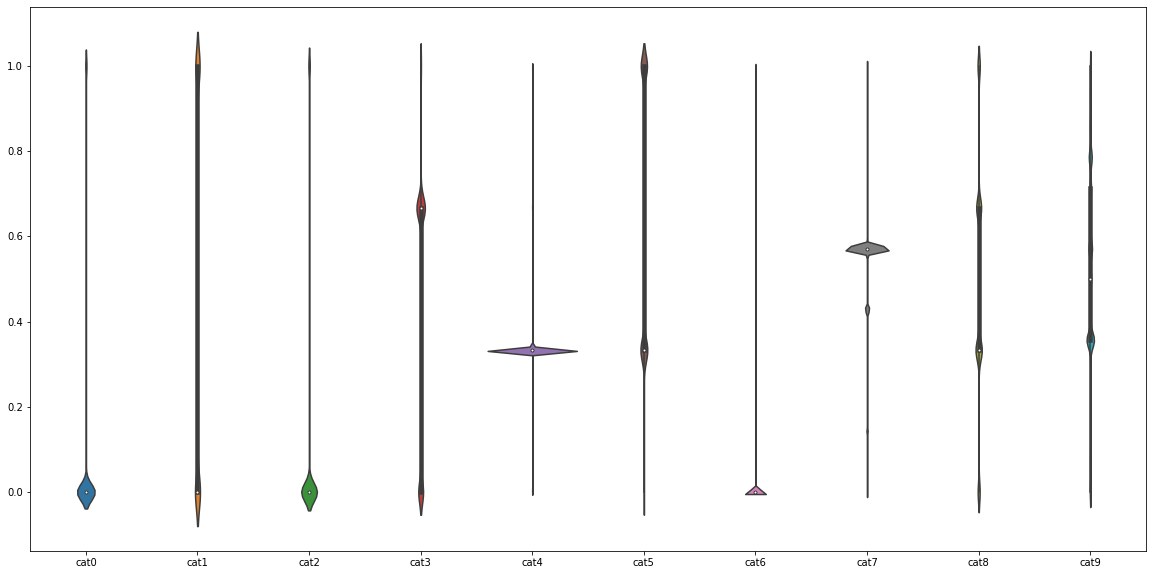

In [22]:
#categorical columns after label encoding 
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
sns.violinplot(data=df_train.iloc[:,:10])
#not a great visulaization

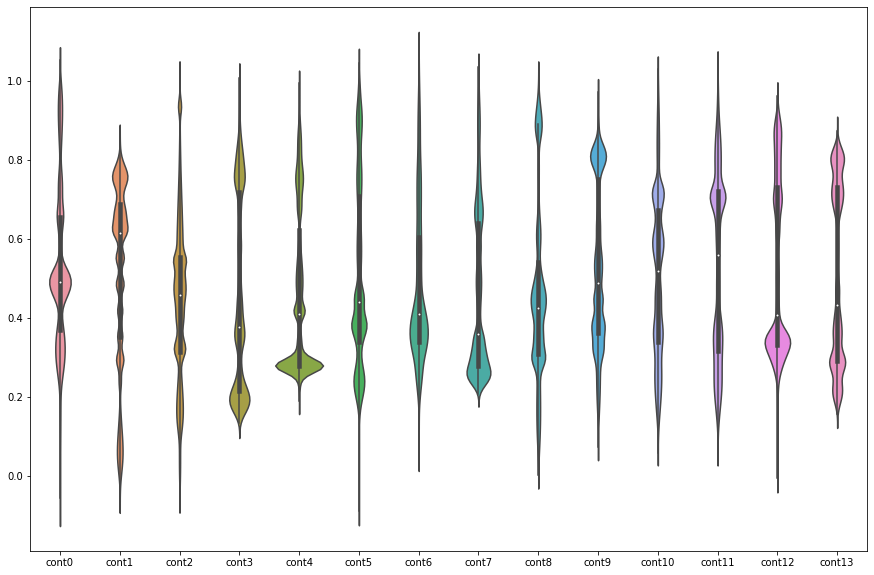

In [23]:
#continuos columns except target

plt.figure(figsize=(15,10))
sns.violinplot(data=df_train.iloc[:,10:])

In [24]:
df_train.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,0.0,1.0,0.0,0.000000,0.333333,1.000000,0.0,0.571429,0.333333,0.571429,0.923191,0.684968,0.124454,0.217886,0.281421,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903
1,1.0,0.0,0.0,0.000000,0.333333,0.333333,0.0,0.571429,0.000000,0.357143,0.437627,0.014213,0.357438,0.846127,0.282354,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464
2,0.0,0.0,0.0,0.666667,0.333333,1.000000,0.0,0.142857,0.333333,0.928571,0.732209,0.760122,0.454644,0.812990,0.293756,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352
3,0.0,0.0,0.0,0.666667,0.333333,1.000000,0.0,0.571429,1.000000,0.714286,0.705142,0.771678,0.153735,0.732893,0.769785,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766
4,0.0,1.0,0.0,0.000000,0.333333,0.333333,0.0,0.571429,0.333333,0.357143,0.486063,0.639349,0.496212,0.354186,0.279105,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743


In [25]:
#normalizing continous values

for column in df.columns[10:]:
  df[column]=df[column]/max(df[column])


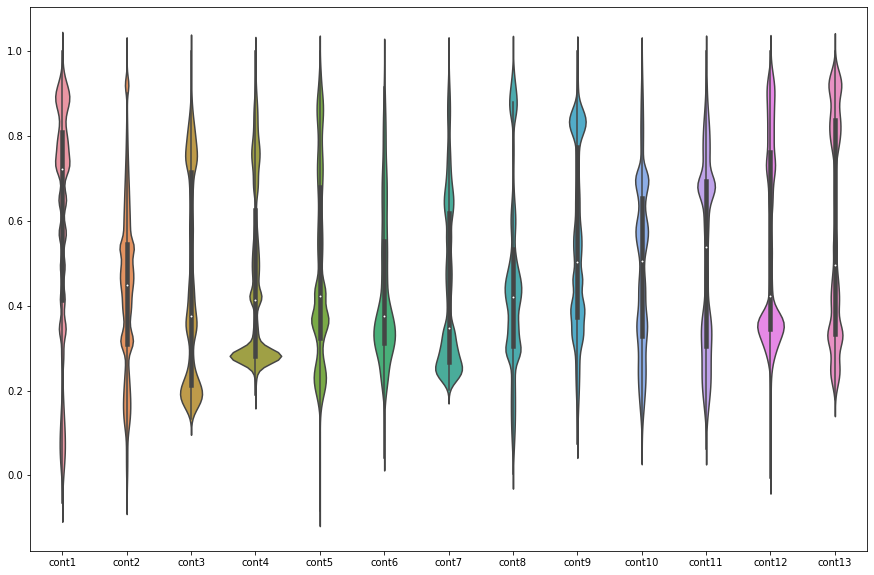

In [26]:
plt.figure(figsize=(15,10))
sns.violinplot(data=df.iloc[:,11:])

In [27]:
x_data=df_train.values
y_data=df_target.values

In [28]:
x_data.shape,y_data.shape

((300000, 24), (300000,))

In [29]:
x_train_data,y_train_data=x_data[:10000],y_data[:10000]
x_test_data,y_test_data=x_data[10000:15000],y_data[10000:15000]

In [30]:
from sklearn.ensemble import RandomForestRegressor

lr=RandomForestRegressor(n_estimators=10)
lr.fit(x_train_data,y_train_data)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [31]:
predictions=lr.predict(x_test_data)

In [32]:
from sklearn import utils

print(utils.multiclass.type_of_target(x_data))

continuous-multioutput


In [33]:
predictions[:100]

array([6.92759527, 7.12864936, 7.30785264, 7.21382273, 6.32609423,
       7.46873951, 8.07040876, 7.22209713, 7.52922083, 7.748833  ,
       7.68502837, 7.2255473 , 7.55505498, 7.74987579, 7.62322592,
       7.85781423, 7.29775279, 6.98313171, 7.48000494, 7.75539746,
       7.23944405, 7.17409779, 7.98691846, 8.08619624, 7.77974147,
       6.89455783, 7.42434259, 7.33016697, 6.99520413, 7.92855325,
       7.8866335 , 7.46976887, 7.47963206, 7.06220573, 7.41459272,
       7.64410201, 7.34843745, 7.72713134, 7.46887722, 6.75908119,
       7.53758624, 7.8933285 , 6.98004034, 7.64822769, 7.42212433,
       7.13873994, 7.92030799, 7.83817665, 7.68135199, 7.37658149,
       7.44679535, 6.72494646, 7.58418343, 7.7468573 , 7.85459022,
       7.59955502, 7.15903372, 7.24179617, 7.71958475, 8.0815568 ,
       7.10854771, 7.03702739, 7.82546093, 7.00271198, 7.9928123 ,
       6.95480117, 7.66908594, 6.89482803, 7.27320598, 7.57006594,
       7.15895474, 7.10715284, 8.17071559, 7.16829157, 7.01978

No handles with labels found to put in legend.


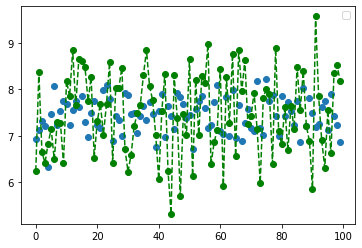

In [34]:
plt.plot(predictions[:100],'o')
plt.plot(y_test_data[:100],'go--')
plt.legend()

In [35]:
from sklearn.metrics import mean_squared_error

error=mean_squared_error(predictions,y_test_data)
error

0.8053799186025618

# 0.80 is the score

In [36]:
#now lets normalize the target value and then train to see MSE,not using minmaxscalar      
#However, we can submit the transformed values in the submission therefore,it is no need to transform the target values and just predict the values directly
x_train_data2,x_test_data2=x_train_data,x_test_data
y_train_data2,y_test_data2=y_train_data/max(y_train_data),y_test_data/max(y_train_data)
lr1=RandomForestRegressor(n_estimators=15)

lr1.fit(x_train_data2,y_train_data2)



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=15, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [37]:
predictions1=lr1.predict(x_test_data2)

In [38]:
from sklearn.metrics import mean_squared_error

error=mean_squared_error(predictions1,y_test_data2)
error

0.007923941417516343

No handles with labels found to put in legend.


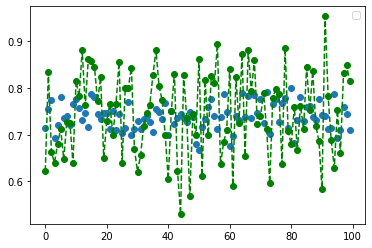

In [39]:
plt.plot(predictions1[:100],'o')
plt.plot(y_test_data2[:100],'go--')
plt.legend()

# Best Method for this task
## Approach 2 (Effective)

In [40]:
## let's move to an effective approach for this task with XGBOOST or LGBM
#EDA
df1.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,A,B,A,A,B,D,A,E,C,I,0.923191,0.684968,0.124454,0.217886,0.281421,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
1,2,B,A,A,A,B,B,A,E,A,F,0.437627,0.014213,0.357438,0.846127,0.282354,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
2,3,A,A,A,C,B,D,A,B,C,N,0.732209,0.760122,0.454644,0.812990,0.293756,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
3,4,A,A,A,C,B,D,A,E,G,K,0.705142,0.771678,0.153735,0.732893,0.769785,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
4,6,A,B,A,A,B,B,A,E,C,F,0.486063,0.639349,0.496212,0.354186,0.279105,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cont0   300000 non-null  float64
 12  cont1   300000 non-null  float64
 13  cont2   300000 non-null  float64
 14  cont3   300000 non-null  float64
 15  cont4   300000 non-null  float64
 16  cont5   300000 non-null  float64
 17  cont6   300000 non-null  float64
 18  cont7   300000 non-null  float64
 19  cont8   300000 non-null  float64
 20  cont9   300000 non-null  float64
 21  cont10  30

In [42]:
df1.drop(columns=['id'],inplace=True)

In [43]:
cont_col=df1.select_dtypes('float').columns.to_list()
cat_col=df1.select_dtypes('object').columns.to_list()

In [44]:
target_column,train_col=cont_col[-1],cat_col+cont_col[:-1]
cat_df,cont_df=df1[cat_col],df1[cont_col]

In [45]:
cat_df.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
0,A,B,A,A,B,D,A,E,C,I
1,B,A,A,A,B,B,A,E,A,F
2,A,A,A,C,B,D,A,B,C,N
3,A,A,A,C,B,D,A,E,G,K
4,A,B,A,A,B,B,A,E,C,F


In [46]:
import matplotlib.pyplot as plt

# **Data preprocessing steps **

* exploring categorical and continous features
* visualizing
* handling data imbalance through statistical approaches
* Feature engineering if required

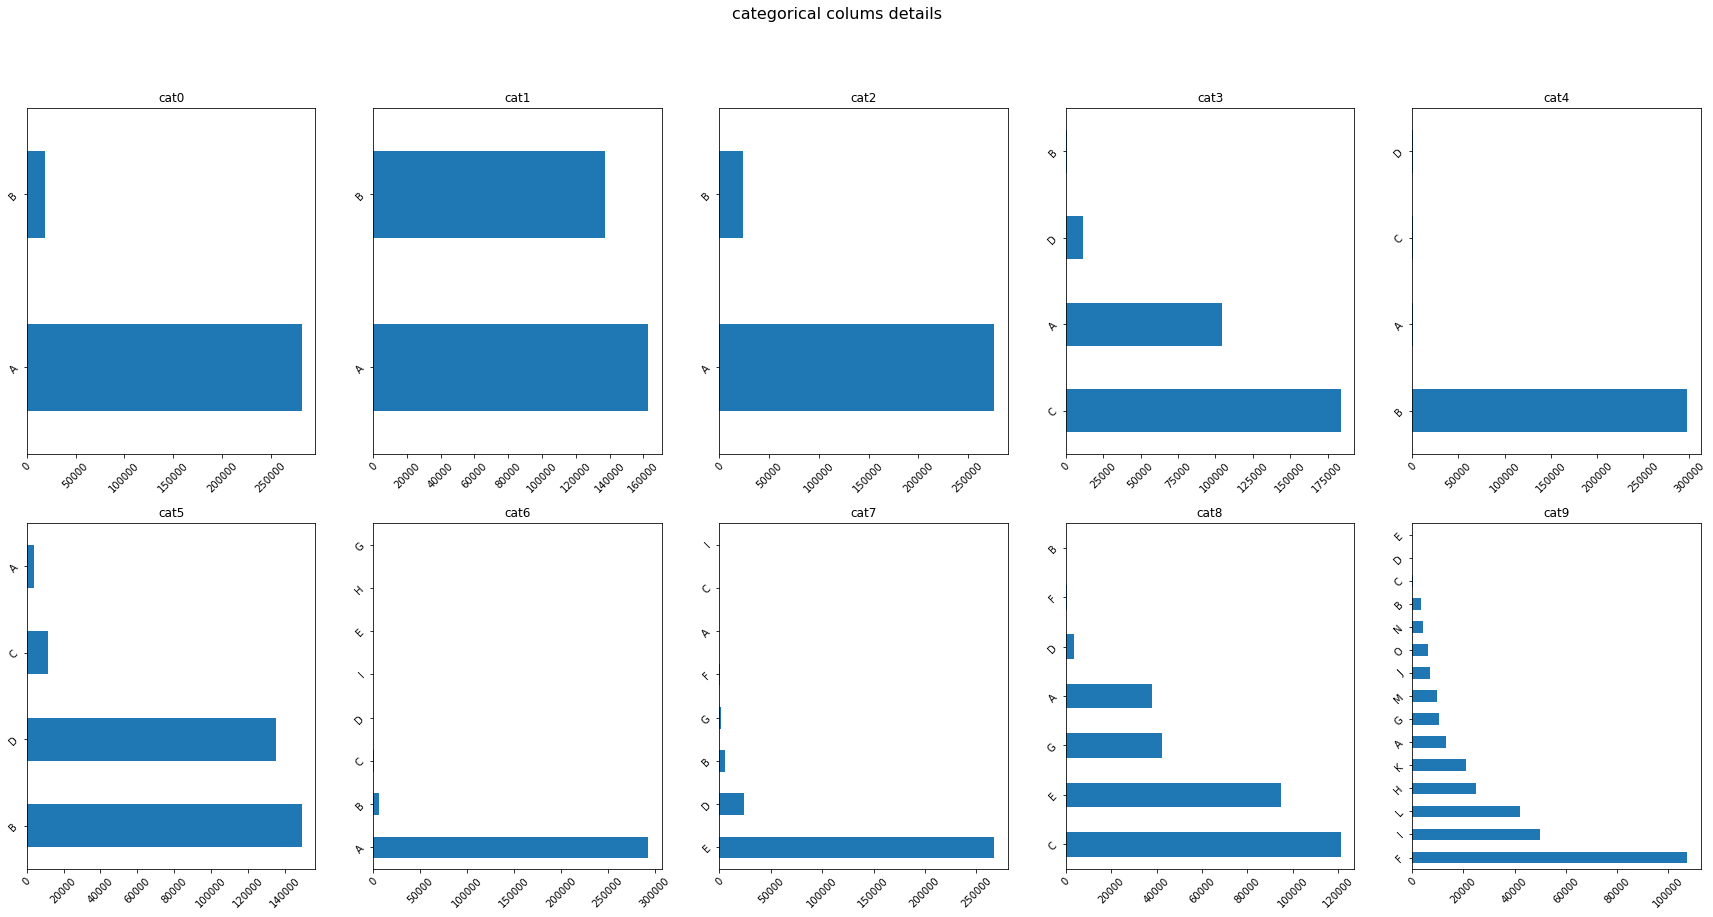

In [47]:
#visualization of categorical column

#categorical column contains nominal values,hence label encoding can be used for every categorical column.
#In case if it would have been ordinal values then one hot encoding followed by column tranformation/getting dummy variable is the best option.

fig,axes=plt.subplots(2,5,figsize=(30,14))

plt.suptitle('categorical colums details',size=16)
row,column=2,5
idx=0
for i in range(row):
  for j in range(column):
    cat_df[cat_col[idx]].value_counts().plot(kind='barh',ax=axes[i,j])
    axes[i,j].tick_params(labelrotation=45)    # it is preferred sometimes roation to the axis value clearly
    axes[i,j].set_title(cat_col[idx])

    idx+=1

# categorical values = A-O 

In [48]:
len(cont_col)

15

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

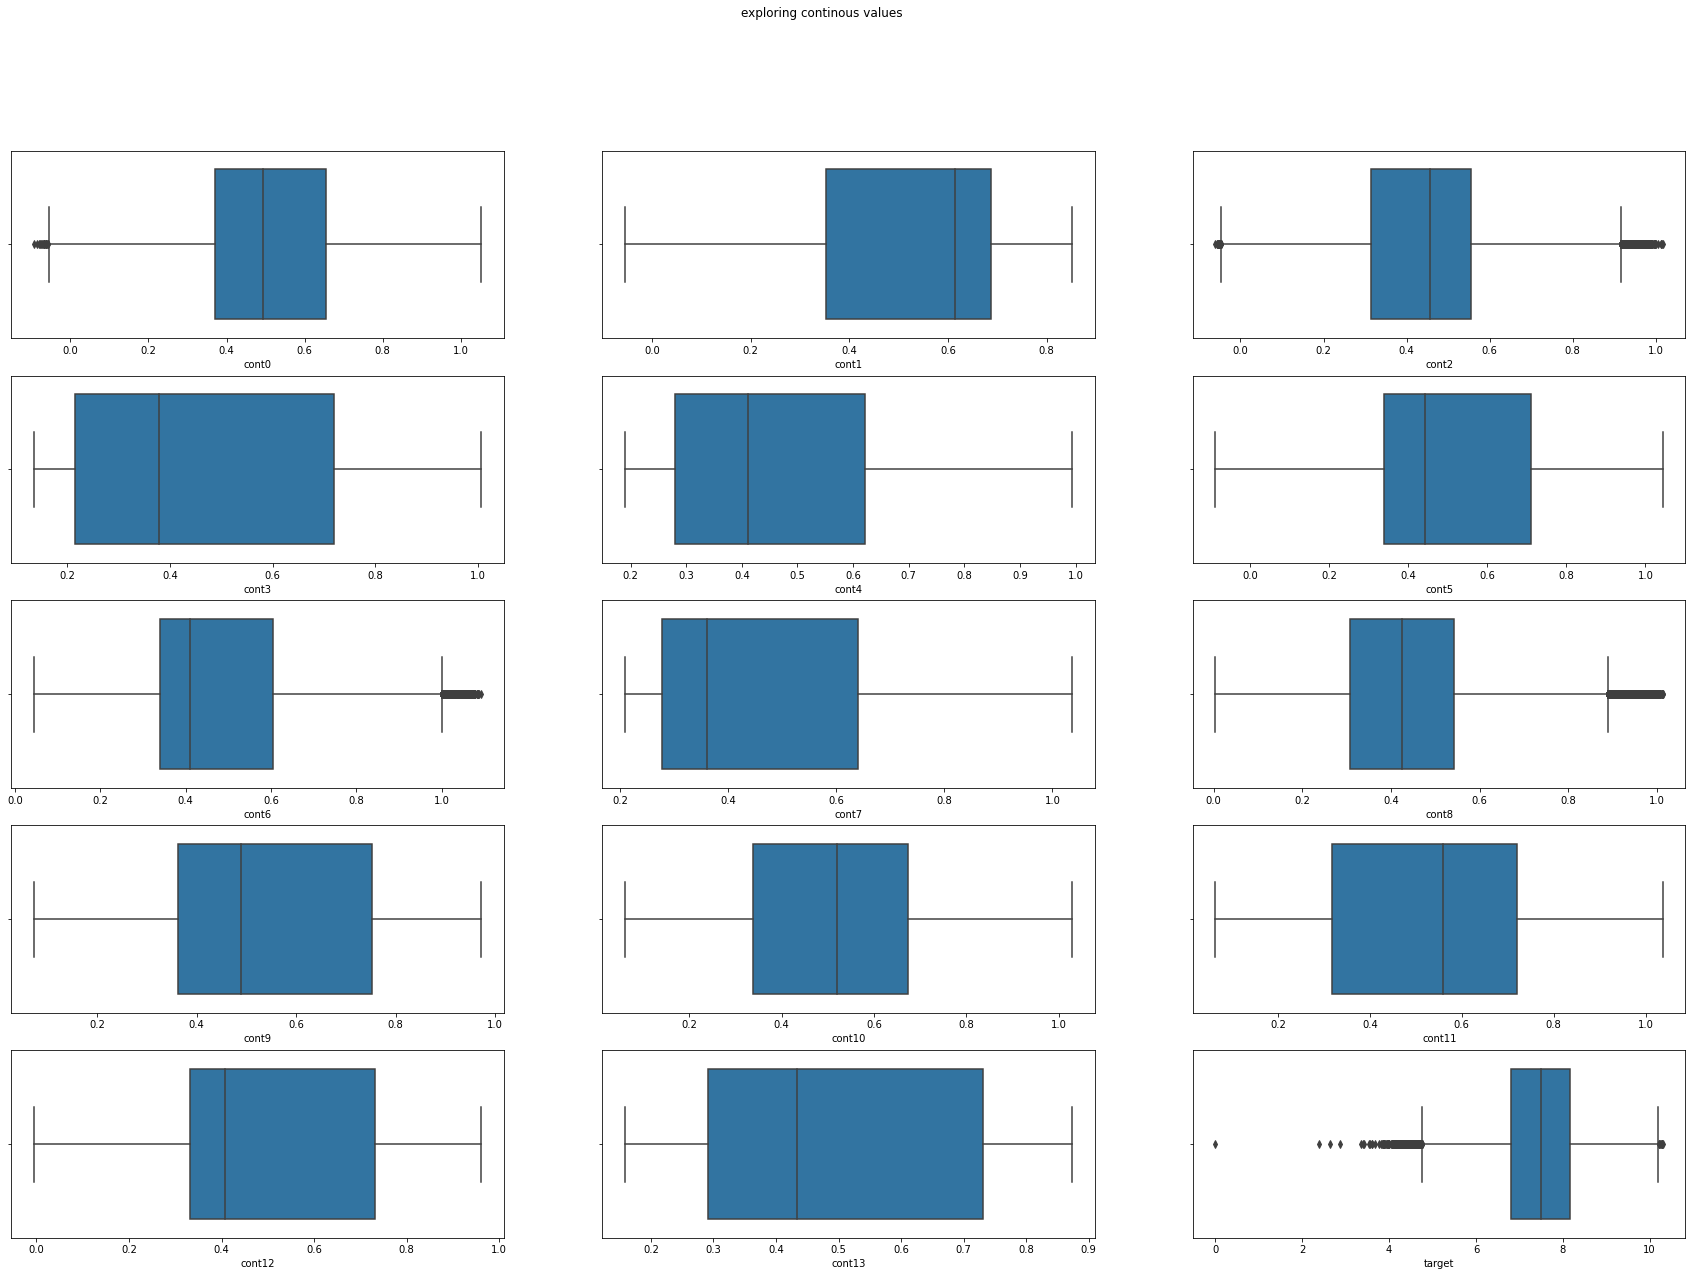

In [49]:
#visualization of continous values
#using matplotlib and seaborn 

# let's plot boxplot for continoous values
# options :boxplot,violinplot,scatterplot,lineplot

import seaborn as sns
fig,axes=plt.subplots(5,3,figsize=(30,20))
plt.suptitle('exploring continous values')
row,column=5,3
idx=0
for i in range(row):
  for j in range(column):
    sns.boxplot(cont_df[cont_col[idx]],ax=axes[i,j])
    idx+=1





In [50]:
df1.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,A,B,A,A,B,D,A,E,C,I,0.923191,0.684968,0.124454,0.217886,0.281421,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
1,B,A,A,A,B,B,A,E,A,F,0.437627,0.014213,0.357438,0.846127,0.282354,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
2,A,A,A,C,B,D,A,B,C,N,0.732209,0.760122,0.454644,0.812990,0.293756,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
3,A,A,A,C,B,D,A,E,G,K,0.705142,0.771678,0.153735,0.732893,0.769785,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
4,A,B,A,A,B,B,A,E,C,F,0.486063,0.639349,0.496212,0.354186,0.279105,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


In [51]:
train_df=df1[cont_col+cat_col]
target=df1['target']
train_df.drop(columns=['target'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [52]:
train_df.columns

Index(['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cat0',
       'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9'],
      dtype='object')

In [53]:
# feature engineering and scaling
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OrdinalEncoder,QuantileTransformer
# ct=ColumnTransformer([('onehot', OrdinalEncoder(),slice(len(cat_col))),('quantile', QuantileTransformer(random_state=0, n_quantiles=1500),slice(len(cat_col),len(cat_col) + len(cont_col) + 5))])
# train_df=ct.fit_transform(train_df)

In [54]:
# ct

In [55]:
for feature in cat_col:
   le = LabelEncoder()
   le.fit(train_df[feature])
   train_df[feature] = le.transform(train_df[feature])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [56]:
train_df.head()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
0,0.923191,0.684968,0.124454,0.217886,0.281421,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,0,1,0,0,1,3,0,4,2,8
1,0.437627,0.014213,0.357438,0.846127,0.282354,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,1,0,0,0,1,1,0,4,0,5
2,0.732209,0.760122,0.454644,0.812990,0.293756,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,0,0,0,2,1,3,0,1,2,13
3,0.705142,0.771678,0.153735,0.732893,0.769785,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,0,0,0,2,1,3,0,4,6,10
4,0.486063,0.639349,0.496212,0.354186,0.279105,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,0,1,0,0,1,1,0,4,2,5


In [57]:
train_df[cat_col]=train_df[cat_col]/10

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [58]:
train_df.head()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
0,0.923191,0.684968,0.124454,0.217886,0.281421,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,0.0,0.1,0.0,0.0,0.1,0.3,0.0,0.4,0.2,0.8
1,0.437627,0.014213,0.357438,0.846127,0.282354,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,0.1,0.0,0.0,0.0,0.1,0.1,0.0,0.4,0.0,0.5
2,0.732209,0.760122,0.454644,0.812990,0.293756,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,0.0,0.0,0.0,0.2,0.1,0.3,0.0,0.1,0.2,1.3
3,0.705142,0.771678,0.153735,0.732893,0.769785,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,0.0,0.0,0.0,0.2,0.1,0.3,0.0,0.4,0.6,1.0
4,0.486063,0.639349,0.496212,0.354186,0.279105,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,0.0,0.1,0.0,0.0,0.1,0.1,0.0,0.4,0.2,0.5


In [59]:
train_df.shape,target.shape

((300000, 24), (300000,))

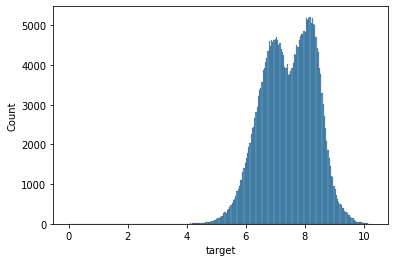

In [60]:
sns.histplot(target)  #histogram gives frequency distribution,In this case we visualizing the frequency distribution of target variable...count ylabel by default

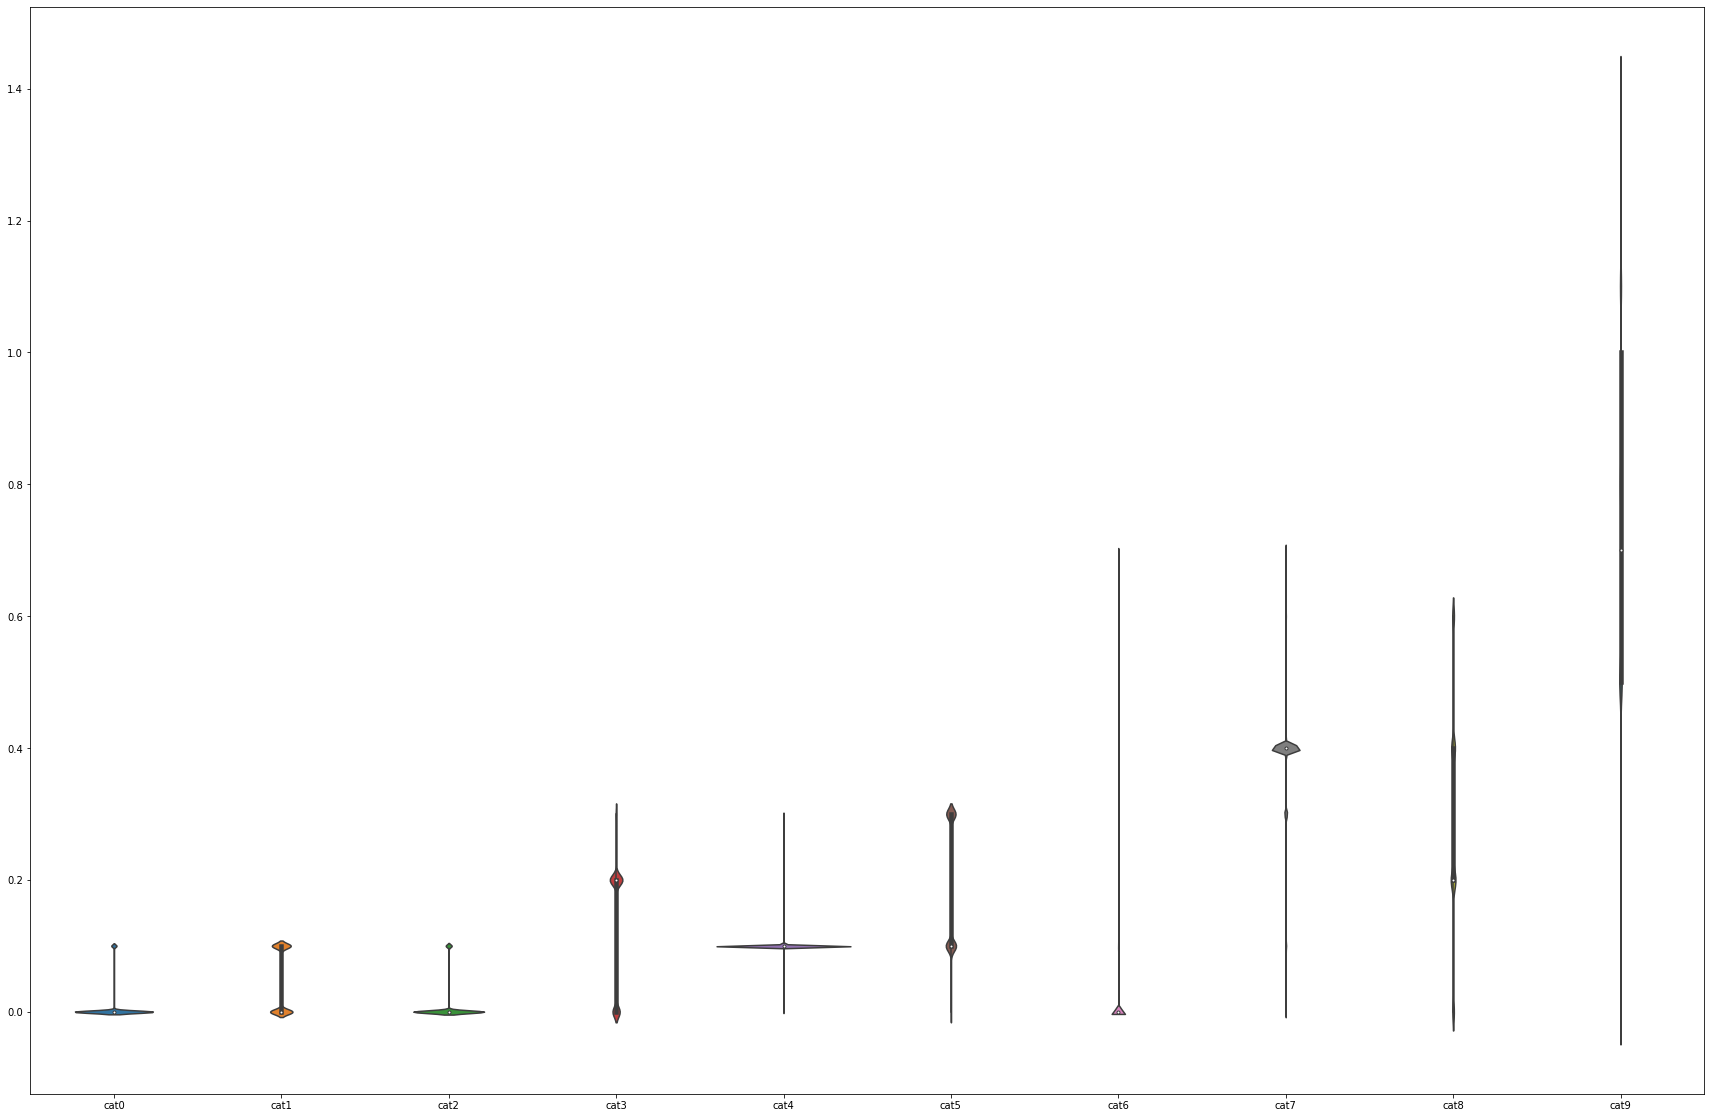

In [61]:
plt.figure(figsize=(30,20))
sns.violinplot(data=train_df[cat_col])

In [62]:
cat_df

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
0,A,B,A,A,B,D,A,E,C,I
1,B,A,A,A,B,B,A,E,A,F
2,A,A,A,C,B,D,A,B,C,N
3,A,A,A,C,B,D,A,E,G,K
4,A,B,A,A,B,B,A,E,C,F
...,...,...,...,...,...,...,...,...,...,...
299995,A,B,A,C,B,B,A,E,E,L
299996,A,B,A,C,B,B,A,E,E,L
299997,A,B,A,C,B,B,A,E,C,M
299998,A,B,B,C,B,B,A,D,E,F


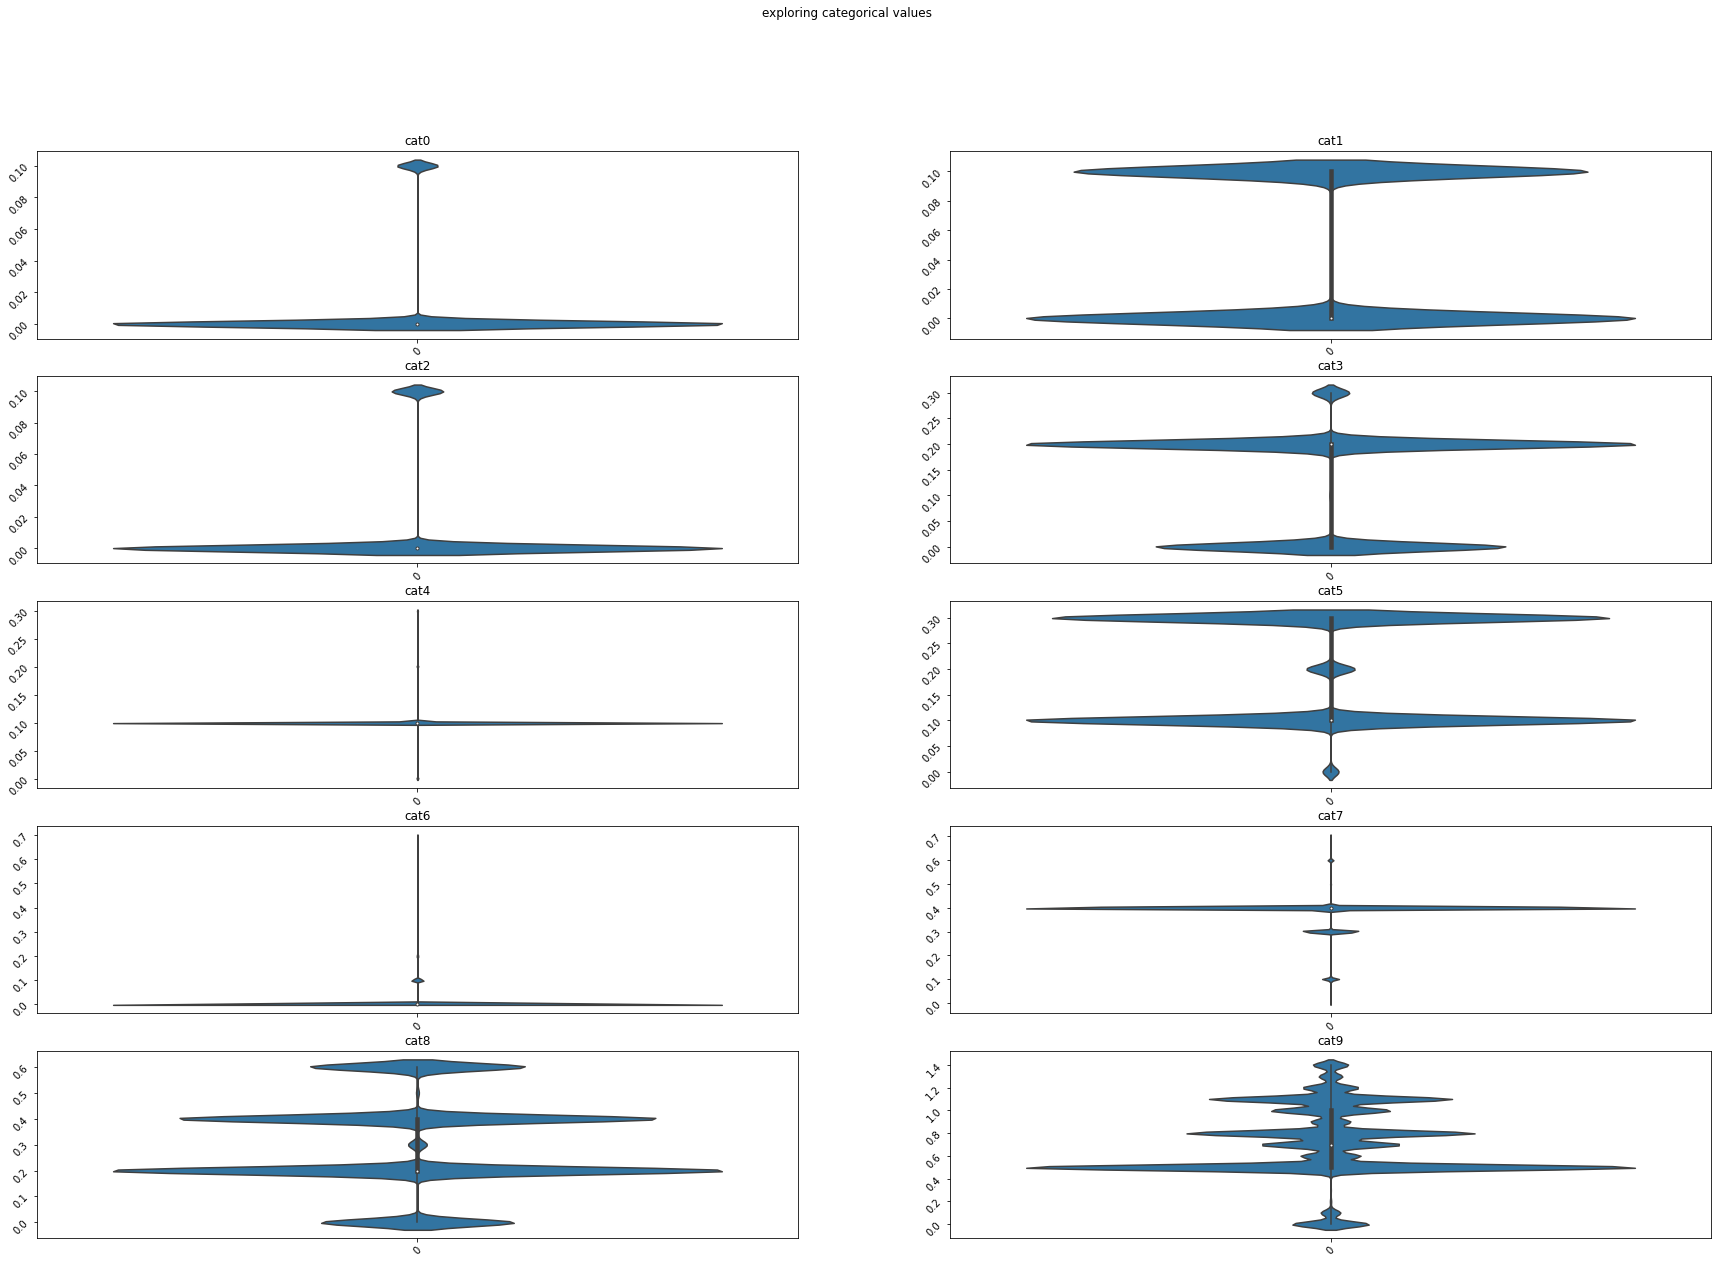

In [63]:
import seaborn as sns
fig,axes=plt.subplots(5,2,figsize=(30,20))
plt.suptitle('exploring categorical values')
row,column=5,2
idx=0
for i in range(row):
  for j in range(column):
    sns.violinplot(data=train_df[cat_col[idx]],ax=axes[i,j])
    axes[i,j].tick_params(labelrotation=45)    # it is preferred sometimes roation to the axis value clearly
    axes[i,j].set_title(cat_col[idx])
    idx+=1

In [64]:
#scaling the features by manual feature engineering to avoid underfitting in training
new_train_df=train_df.drop(columns=['cat0','cat2','cat6'])




# Machine learning models 
###using ensemble of xgboost+lightbgm+catboost

In [65]:
new_train_df.head()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cat1,cat3,cat4,cat5,cat7,cat8,cat9
0,0.923191,0.684968,0.124454,0.217886,0.281421,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,0.1,0.0,0.1,0.3,0.4,0.2,0.8
1,0.437627,0.014213,0.357438,0.846127,0.282354,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,0.0,0.0,0.1,0.1,0.4,0.0,0.5
2,0.732209,0.760122,0.454644,0.812990,0.293756,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,0.0,0.2,0.1,0.3,0.1,0.2,1.3
3,0.705142,0.771678,0.153735,0.732893,0.769785,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,0.0,0.2,0.1,0.3,0.4,0.6,1.0
4,0.486063,0.639349,0.496212,0.354186,0.279105,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,0.1,0.0,0.1,0.1,0.4,0.2,0.5


In [66]:
from sklearn.preprocessing import MinMaxScaler

norm=MinMaxScaler()
new_train_df=norm.fit_transform(new_train_df)

In [67]:
x_data=new_train_df
y_data=target.values

In [68]:
x_data.shape,y_data.shape

((300000, 21), (300000,))

In [69]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,random_state=0)

In [70]:
x_train[:5,:]

array([[0.93219519, 0.16051874, 0.32445317, 0.78373806, 0.68933099,
        0.50179329, 0.4126368 , 0.32908657, 0.64987321, 0.82374914,
        0.54692099, 0.60131742, 0.7893273 , 0.8996718 , 1.        ,
        0.66666667, 0.33333333, 1.        , 0.57142857, 0.        ,
        0.78571429],
       [0.74918477, 0.59593252, 0.55571602, 0.06199033, 0.11187896,
        0.70095636, 0.35603564, 0.0981657 , 0.31886786, 0.64253395,
        0.32720257, 0.64460276, 0.77644024, 0.70512696, 1.        ,
        0.        , 0.        , 1.        , 0.57142857, 0.33333333,
        0.35714286],
       [0.51107093, 0.67031959, 0.2821187 , 0.20362374, 0.11302417,
        0.48586549, 0.61198465, 0.86660237, 0.47030373, 0.49850458,
        0.5584304 , 0.73316271, 0.88115748, 0.16950509, 0.        ,
        0.66666667, 0.33333333, 0.33333333, 0.57142857, 0.        ,
        0.71428571],
       [0.47608507, 0.83005109, 0.49025418, 0.07271378, 0.27908406,
        0.39904295, 0.38770394, 0.18525209, 0.3038474

In [71]:
!pip install xgboost

In [72]:
!pip install lightgbm

In [73]:
!pip install catboost

     |████████████████████████████████| 65.7MB 64kB/s 


In [74]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [75]:
#hyperparameter tuning of boosting models
SEED=22
N_ESTIMATORS=30000
ensemble_params = {
    'lgb' : {'random_state': SEED,
          'metric': 'rmse',
          'n_estimators': N_ESTIMATORS,
          'n_jobs': -1,
          'cat_feature': [x for x in range(len(cat_col))],
          'bagging_seed': SEED,
          'feature_fraction_seed': SEED,
          'learning_rate': 0.003899156646724397,
          'max_depth': 99,
          'num_leaves': 63,
          'reg_alpha': 9.562925363678952,
          'reg_lambda': 9.355810045480153,
          'colsample_bytree': 0.2256038826485174,
          'min_child_samples': 290,
          'subsample_freq': 1,
          'subsample': 0.8805303688019942,
          'max_bin': 882,
          'min_data_per_group': 127,
          'cat_smooth': 96,
          'cat_l2': 19
          },
    'xgb': {
        'random_state': SEED,
        'max_depth': 13,
        'learning_rate': 0.020206705089028228,
        'gamma': 3.5746731812451156,
        'min_child_weight': 564,
        'n_estimators': 8000,
        'colsample_bytree': 0.5015940592112956,
        'subsample': 0.6839489639112909,
        'reg_lambda': 18.085502002853246,
        'reg_alpha': 0.17532087359570606,
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'n_jobs': -1
    },
    'cat': {
        'random_state': SEED,
        'depth': 3.0,
        'fold_len_multiplier': 1.1425259013471902,
        'l2_leaf_reg': 7.567589781752637,
        'leaf_estimation_backtracking': 'AnyImprovement',
        'learning_rate': 0.25121635918496565,
        'max_bin': 107.0,
        'min_data_in_leaf': 220.0,
        'random_strength': 3.2658690042589726,
        'n_estimators': 8000,
        'eval_metric': 'RMSE',
    }
}

In [76]:
#model dev

class EnsembleModel():
  def __init__(self,**params):
    self.xgb=params['xgb']
    self.cat=params['cat']
    self.lgb=params['lgb']

    self.xgbmodel= XGBRegressor(**self.xgb)
    self.catmodel= CatBoostRegressor(**self.cat)
    self.lgbmodel= LGBMRegressor(**self.lgb)

  def fitmodel(self,x_train_data,y_train_data,x_test_data,y_test_data):
    self.xgbmodel.fit(x_train_data,y_train_data,eval_set=[(x_train_data,y_train_data),(x_test_data, y_test_data)], early_stopping_rounds=100)
    self.catmodel.fit(x_train_data,y_train_data,eval_set=[(x_train_data,y_train_data),(x_test_data, y_test_data)], early_stopping_rounds=100)
    self.lgbmodel.fit(x_train_data,y_train_data,eval_set=[(x_train_data,y_train_data),(x_test_data, y_test_data)], early_stopping_rounds=100)

  def predict(self,x_test_data,y_test_data):
    return (self.xgbmodel.predict(x_test_data)+self.catmodel.predict(x_test_data)+self.lgbmodel.predict(x_test_data))/3



In [77]:
from sklearn.model_selection import KFold
model=EnsembleModel(**ensemble_params)

In [78]:
# N_FOLDS=5
# preds=[]
# kf=KFold(n_splits=N_FOLDS,random_state=SEED,shuffle=True)

In [80]:
model.fitmodel(x_train,y_train,x_test,y_test)

  

Streaming output truncated to the last 5000 lines.
[299]	validation_0-rmse:0.838583	validation_1-rmse:0.850937
[300]	validation_0-rmse:0.838497	validation_1-rmse:0.850904
[301]	validation_0-rmse:0.838426	validation_1-rmse:0.850873
[302]	validation_0-rmse:0.838337	validation_1-rmse:0.850822
[303]	validation_0-rmse:0.83826	validation_1-rmse:0.850792
[304]	validation_0-rmse:0.838167	validation_1-rmse:0.850751
[305]	validation_0-rmse:0.838079	validation_1-rmse:0.850718
[306]	validation_0-rmse:0.837981	validation_1-rmse:0.85068
[307]	validation_0-rmse:0.837902	validation_1-rmse:0.850651
[308]	validation_0-rmse:0.837822	validation_1-rmse:0.85062
[309]	validation_0-rmse:0.837741	validation_1-rmse:0.850591
[310]	validation_0-rmse:0.837675	validation_1-rmse:0.850565
[311]	validation_0-rmse:0.837611	validation_1-rmse:0.850531
[312]	validation_0-rmse:0.837521	validation_1-rmse:0.850482
[313]	validation_0-rmse:0.837446	validation_1-rmse:0.85045
[314]	validation_0-rmse:0.837359	validation_1-rmse:0.

NameError: ignored

In [100]:
preds=[]
preds+=list(model.predict(x_test,y_test))

In [103]:
np.array(preds).shape

(60000,)